Training Accuracy: 0.947829131652661
Training Classification Report:
                          precision    recall  f1-score   support

Additional Hospital Care       0.97      0.76      0.85       510
                    Died       1.00      0.94      0.97       154
                    Home       0.94      0.99      0.97      2174
                   Other       1.00      0.61      0.76        18

                accuracy                           0.95      2856
               macro avg       0.98      0.83      0.89      2856
            weighted avg       0.95      0.95      0.95      2856

Validation Accuracy: 0.7622549019607843
Validation Classification Report:
                          precision    recall  f1-score   support

Additional Hospital Care       0.49      0.33      0.40       160
                    Died       0.38      0.40      0.39        42
                    Home       0.84      0.90      0.87       612
                   Other       0.00      0.00      0.00      

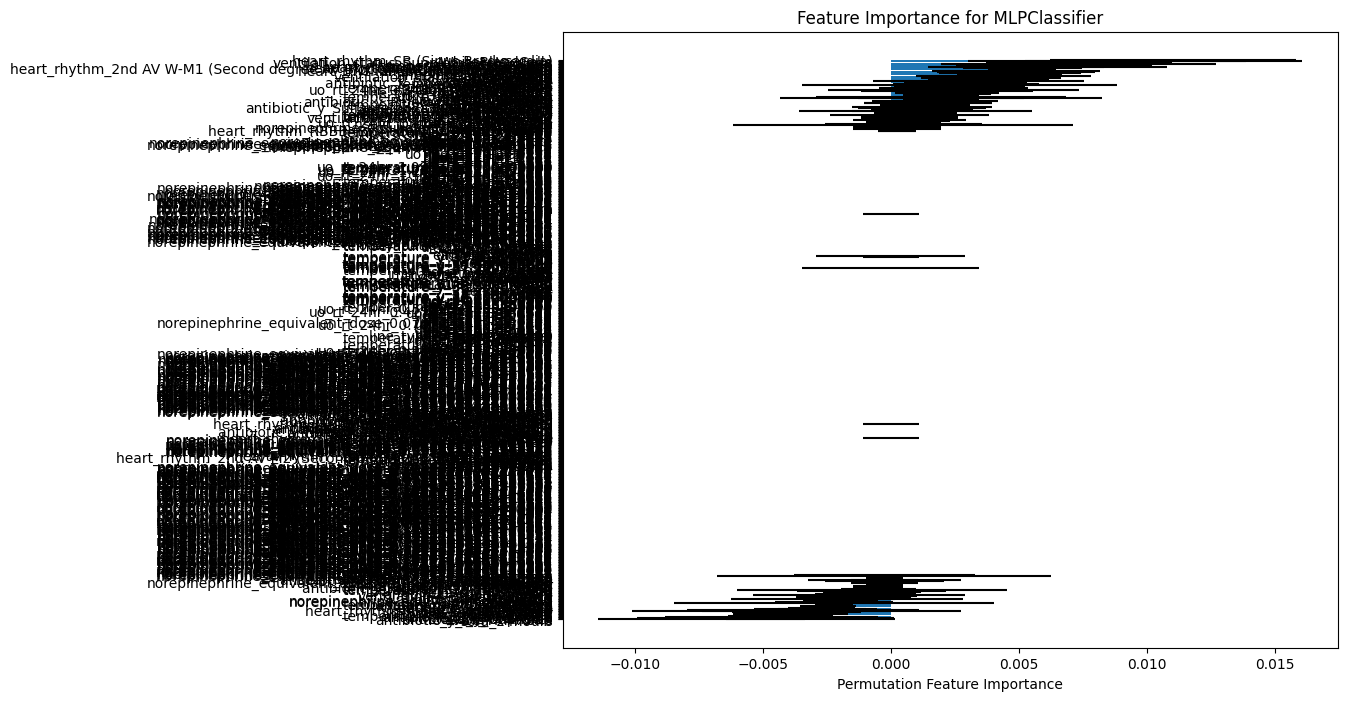

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance

# Step 1: Load the CSV file
file_path = 'merged_df.csv'
df = pd.read_csv(file_path)

# Step 2: Drop unnecessary columns ('subject_id', 'hadm_id', 'stay_id', 'discharge_location')
df_cleaned = df.drop(columns=['subject_id', 'hadm_id', 'stay_id', 'discharge_location'])

# Step 3: Convert categorical columns to numerical using one-hot encoding (for features only, not the target)
df_encoded = pd.get_dummies(df_cleaned.drop(columns=['discharge_category']), drop_first=True)

# Step 4: Define features (X) and target (y)
X = df_encoded
y = df_cleaned['discharge_category']

# Step 5: First split the data into 70% training, 20% validation, and 10% testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=34)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.222, random_state=34)

# Step 6: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 7: Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=34)

# Step 8: Train the model
mlp.fit(X_train_scaled, y_train)

# Step 9: Evaluate on training data
y_train_pred = mlp.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))

# Step 10: Evaluate on validation data
y_val_pred = mlp.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, zero_division=0))

# Step 11: Evaluate on test data
y_test_pred = mlp.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Step 12: Compute feature importance using permutation importance
perm_importance = permutation_importance(mlp, X_test_scaled, y_test, n_repeats=10, random_state=34)

# Step 13: Visualize feature importance
feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.xlabel("Permutation Feature Importance")
plt.title("Feature Importance for MLPClassifier")
plt.show()


c:\Users\julev\anaconda3\envs\cudaEnv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66 104 105 106 107 108 109 110] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\julev\anaconda3\envs\cudaEnv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training Accuracy: 0.771358543417367
Training Classification Report:
                          precision    recall  f1-score   support

Additional Hospital Care       0.39      0.18      0.25       510
                    Died       0.62      0.05      0.10       154
                    Home       0.81      0.97      0.88      2174
                   Other       0.00      0.00      0.00        18

                accuracy                           0.77      2856
               macro avg       0.45      0.30      0.31      2856
            weighted avg       0.72      0.77      0.72      2856

Validation Accuracy: 0.7561274509803921
Validation Classification Report:
                          precision    recall  f1-score   support

Additional Hospital Care       0.39      0.18      0.25       160
                    Died       0.00      0.00      0.00        42
                    Home       0.79      0.96      0.87       612
                   Other       0.00      0.00      0.00      

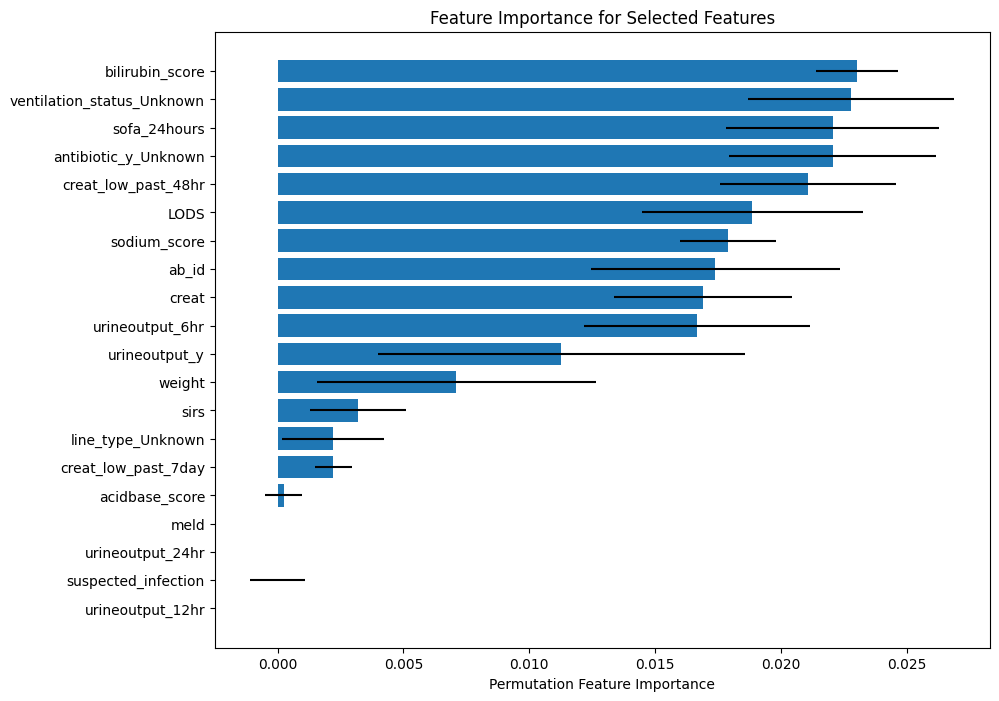

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance

# Step 1: Load the CSV file
file_path = 'merged_df.csv'
df = pd.read_csv(file_path)

# Step 2: Drop unnecessary columns ('subject_id', 'hadm_id', 'stay_id', 'discharge_location')
df_cleaned = df.drop(columns=['subject_id', 'hadm_id', 'stay_id', 'discharge_location'])

# Step 3: Convert categorical columns to numerical using one-hot encoding (for features only, not the target)
df_encoded = pd.get_dummies(df_cleaned.drop(columns=['discharge_category']), drop_first=True)

# Step 4: Define features (X) and target (y)
X = df_encoded
y = df_cleaned['discharge_category']

# Step 5: Perform feature selection using SelectKBest
k_best = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
X_new = k_best.fit_transform(X, y)

# Step 6: First split the data into 70% training, 20% validation, and 10% testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size=0.1, random_state=34)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.222, random_state=34)

# Step 7: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 8: Define the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=34)

# Step 9: Train the model
mlp.fit(X_train_scaled, y_train)

# Step 10: Evaluate on training data
y_train_pred = mlp.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))

# Step 11: Evaluate on validation data
y_val_pred = mlp.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, zero_division=0))

# Step 12: Evaluate on test data
y_test_pred = mlp.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Step 13: Compute feature importance using permutation importance
perm_importance = permutation_importance(mlp, X_test_scaled, y_test, n_repeats=10, random_state=34)

# Step 14: Visualize feature importance
selected_features = X.columns[k_best.get_support()]  # Get the names of selected features
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 8))
plt.barh(selected_features[sorted_idx], perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.xlabel("Permutation Feature Importance")
plt.title("Feature Importance for Selected Features")
plt.show()
